# Decision Trees: Solution

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline

## Load in the breast cancer dataset from sklearn

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## split the data into Training and Testing

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0
)

## fit a Decision Tree Classifier model on the breast cancer dataset from sklearn

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## plot the Decision Tree model 

* HINT: using sklearn's plot_tree 

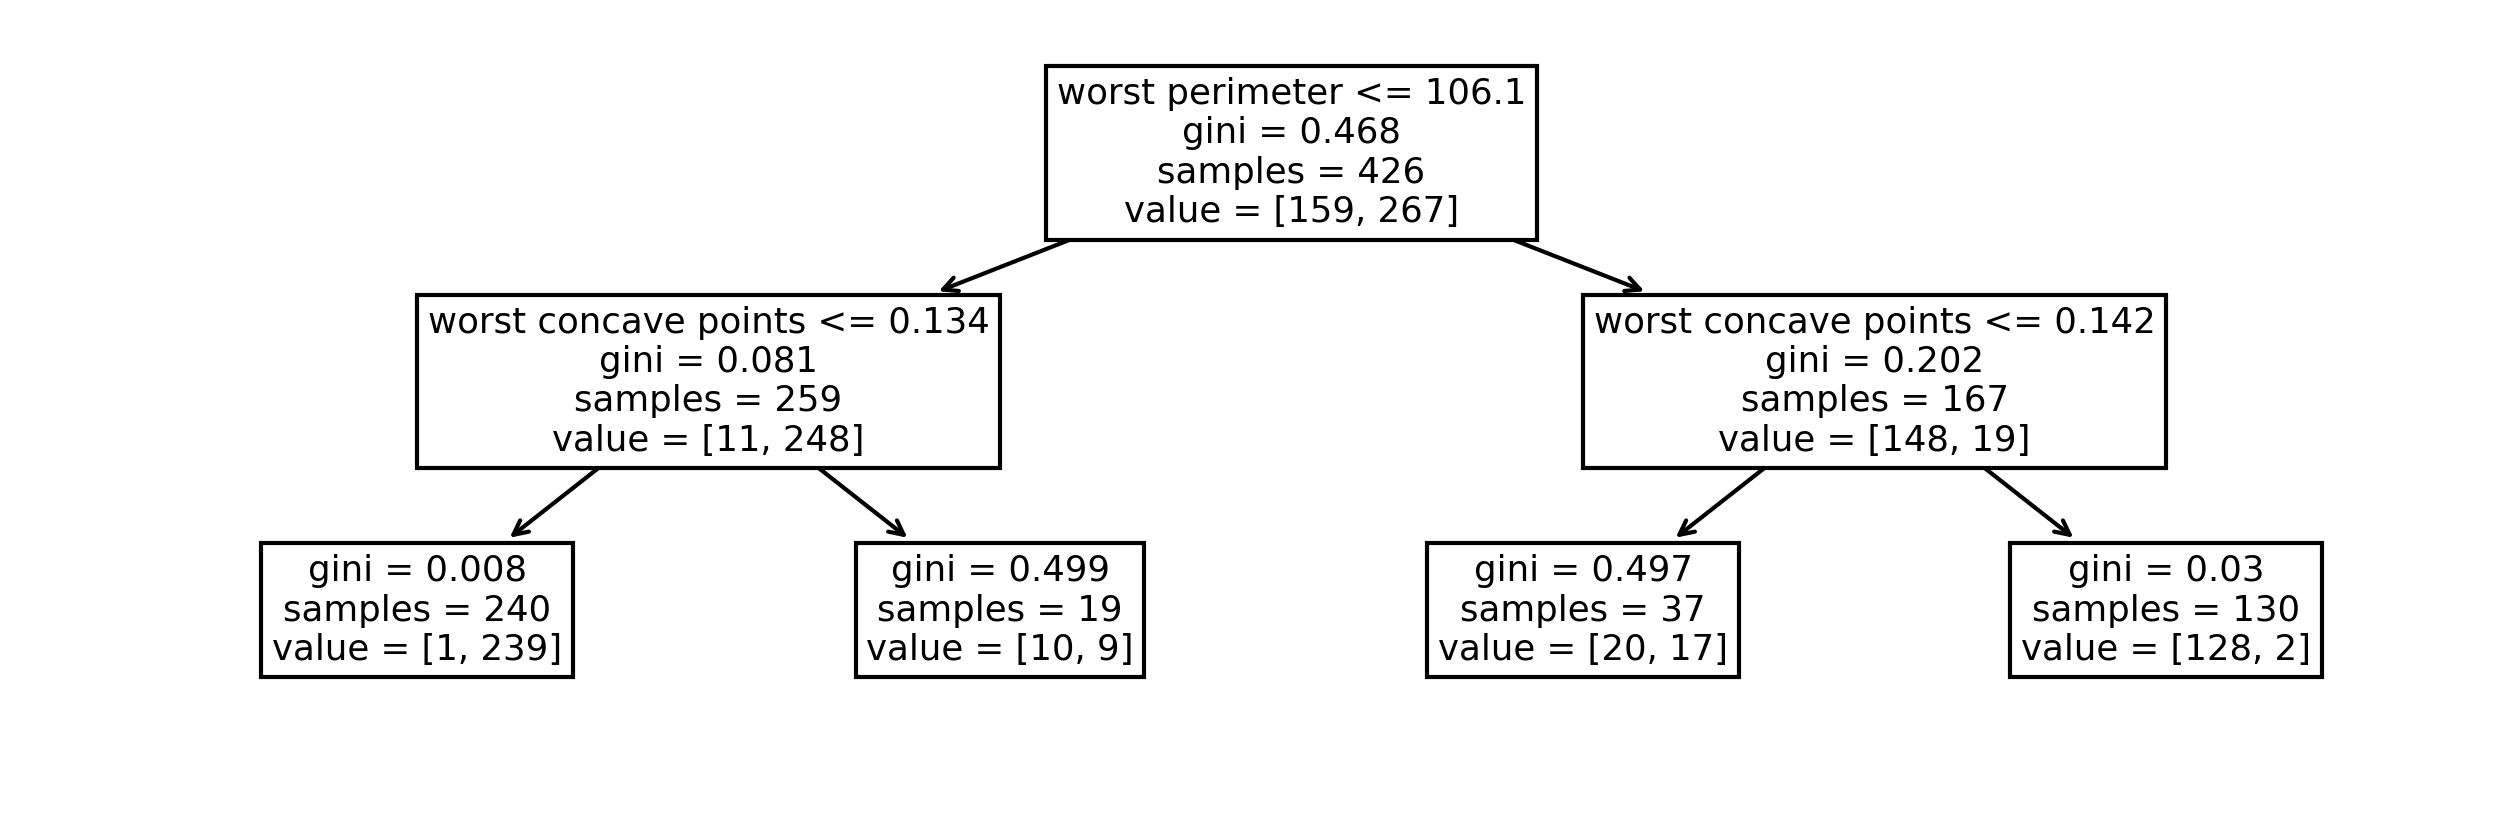

In [5]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree, feature_names=cancer.feature_names)
plt.savefig("images/mpl_tree_plot.png")

## plot the Decision Tree 

### example of export_graphviz & graphviz with iris

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree = tree.fit(iris.data, iris.target)

from sklearn.tree import export_graphviz
tree_dot = export_graphviz(tree)

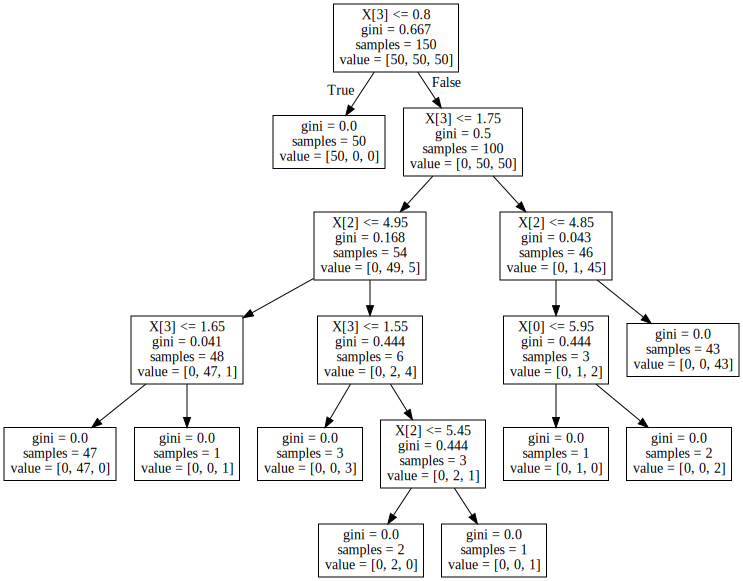

In [7]:
import graphviz # causes a run time error
import os # solution: https://stackoverflow.com/a/44625895
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/iris_no_pruning", cleanup=True, view=True) 
graph

# Use export_graphviz & graphviz to plot the Decision Tree of the breast cancer dataset from sklearn 

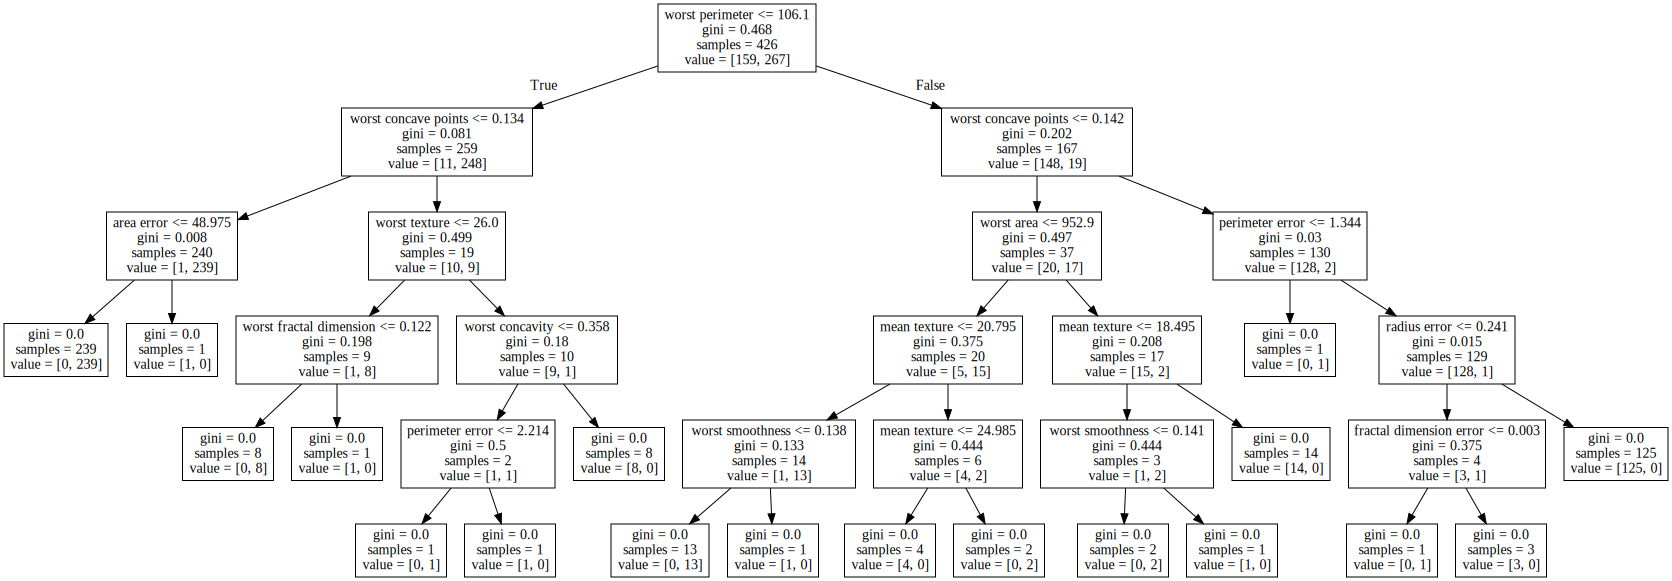

In [8]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/no_pruning", cleanup=True) 
# use "view=True" inside graph.render to have the created png file opened
# https://graphviz.readthedocs.io/en/stable/manual.html#integration-with-viewers
graph

# Parameter Tuning

* HINT: trees can have different "maximum depth"

* EXTRA: is there a limit to this depth?

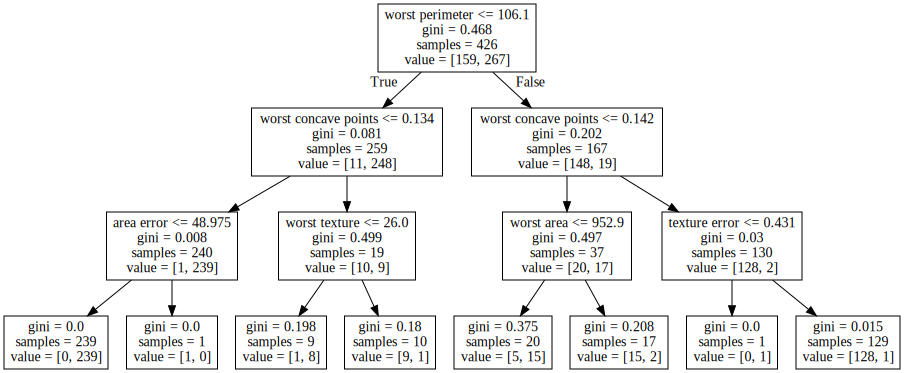

In [9]:
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/max_depth_3", cleanup=True)
# use "view=True" inside graph.render to have the created png file opened
graph

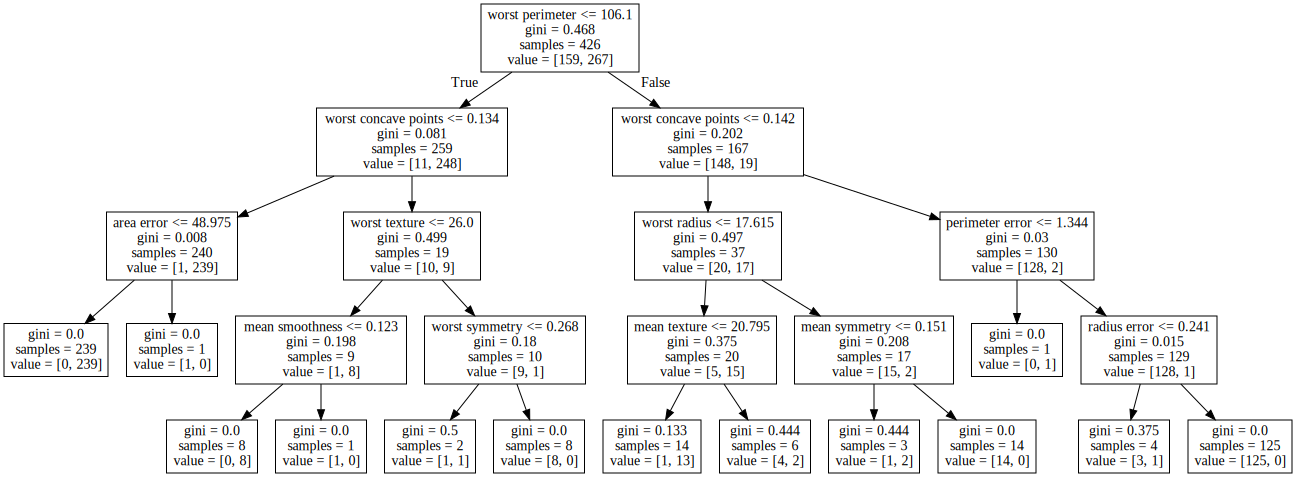

In [10]:
tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/max_depth_4", cleanup=True)
# use "view=True" inside graph.render to have the created png file opened
graph

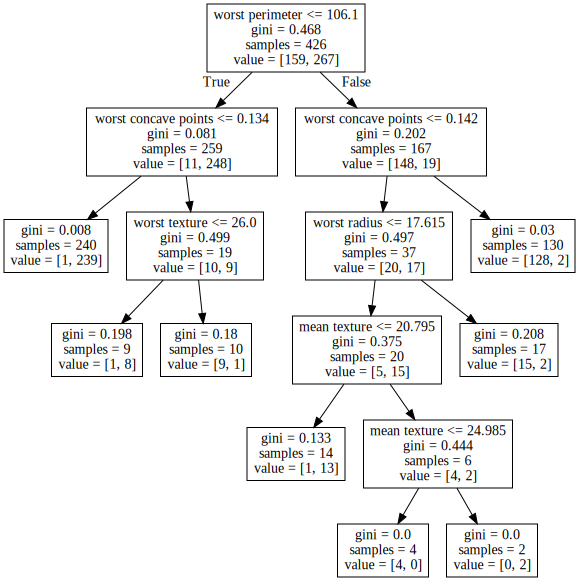

In [11]:
tree = DecisionTreeClassifier(max_leaf_nodes=8).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/max_leaf_nodes_8", cleanup=True)
# use "view=True" inside graph.render to have the created png file opened
graph

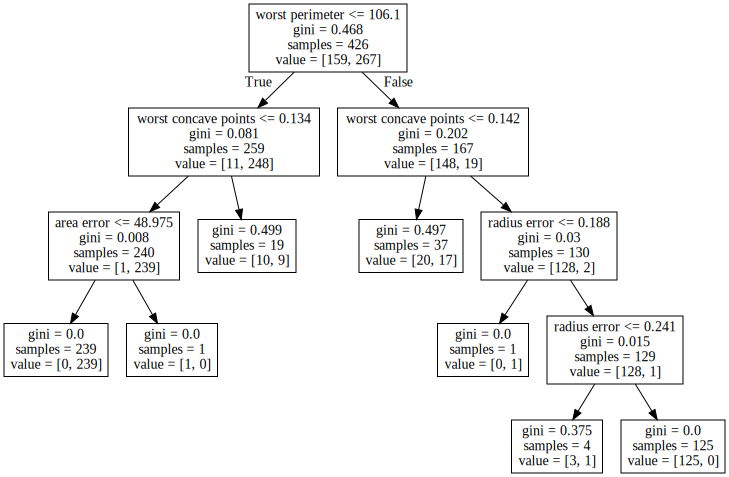

In [12]:
tree = DecisionTreeClassifier(min_samples_split=50).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/min_samples_split_50", cleanup=True)
# use "view=True" inside graph.render to have the created png file opened
graph